In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,MaritalStatus,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   MaritalStatus    600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.00,600.00,600.00
mean,55208.38,108747.37,15.56
std,26204.83,49850.08,8.84
min,10003.00,25779.00,0.00
25%,32871.50,66966.75,8.00
50%,55074.50,106493.50,15.00
75%,78611.75,150114.25,24.00
max,99619.00,199778.00,30.00


In [5]:
df.drop(['Undergrad','Taxable.Income','City.Population','Work.Experience'], axis="columns", inplace=True)

In [6]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

MaritalStatus : ['Single' 'Divorced' 'Married']
Urban : ['YES' 'NO']


In [7]:
df['Urban'] = df.Urban.astype("category").cat.codes
df['MaritalStatus'] = df.MaritalStatus.astype("category").cat.codes

# Data Visualisation

In [8]:
df.Urban.value_counts()
df.MaritalStatus.value_counts()

2    217
1    194
0    189
Name: MaritalStatus, dtype: int64

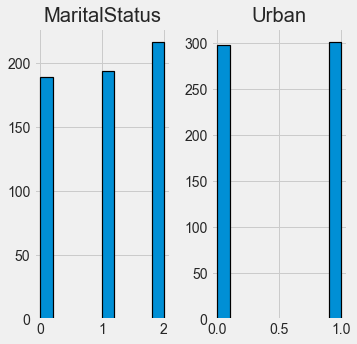

In [9]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(5, 5));

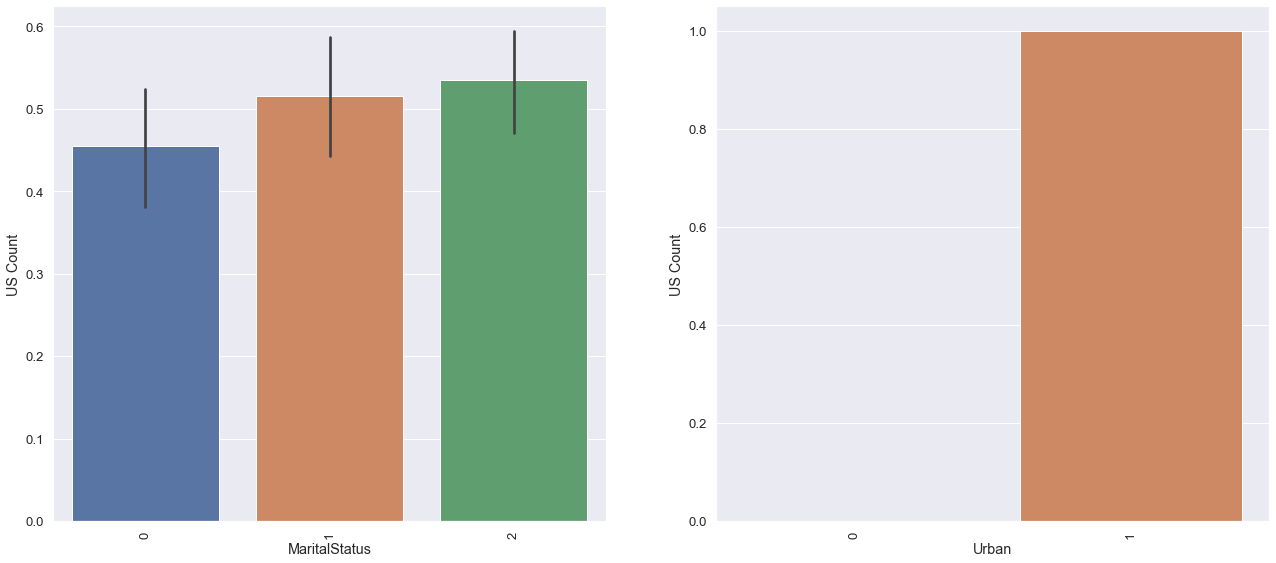

In [10]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Urban', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('US Count')
    plt.xlabel(f'{column}')

# Correlation Matrix

<AxesSubplot:>

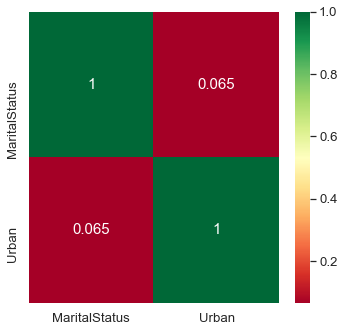

In [11]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Data Processing

In [12]:
categorical_col.remove('Urban')
categorical_col.remove('MaritalStatus')

In [13]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Urban', axis=1)
y = df.Urban

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('MaritalStatus', axis=1)
y = df.MaritalStatus

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Applying machine learning algorithms

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 38.10%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2  accuracy  macro avg  weighted avg
precision   0.00   0.00   0.38      0.38       0.13          0.15
recall      0.00   0.00   1.00      0.38       0.33          0.38
f1-score    0.00   0.00   0.55      0.38       0.18          0.21
support   126.00 134.00 160.00      0.38     420.00        420.00
_______________________________________________
Confusion Matrix: 
 [[  0   0 126]
 [  0   0 134]
 [  0   0 160]]

Test Result:
Accuracy Score: 31.67%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.00  0.00  0.32      0.32       0.11          0.10
recall     0.00  0.00  1.00      0.32       0.33          0.32
f1-score   0.00  0.00  0.48      0.32       0.16          0.15
support   63.00 60.00 57.00      0.32     180.00        180.00
_________________________

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classif

# Decision Tree Classifier Hyperparameter tuning

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 38.10%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2  accuracy  macro avg  weighted avg
precision   0.00   0.00   0.38      0.38       0.13          0.15
recall      0.00   0.00   1.00      0.38       0.33          0.38
f1-score    0.00   0.00   0.55      0.38       0.18          0.21
support   126.00 134.00 160.00      0.38     420.00        420.00
_______________________________________________
Confusion Matrix: 
 [[  0   0 126]
 [  0   0 134]
 [  0   0 160]]

Test Result:
Accuracy Score: 31.67%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.00  0.00  0.32      0.32       0.11          0.10
recall     0.00  0.00  1.0

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classif

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 38.10%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2  accuracy  macro avg  weighted avg
precision   0.00   0.00   0.38      0.38       0.13          0.15
recall      0.00   0.00   1.00      0.38       0.33          0.38
f1-score    0.00   0.00   0.55      0.38       0.18          0.21
support   126.00 134.00 160.00      0.38     420.00        420.00
_______________________________________________
Confusion Matrix: 
 [[  0   0 126]
 [  0   0 134]
 [  0   0 160]]

Test Result:
Accuracy Score: 31.67%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.00  0.00  0.32      0.32       0.11          0.10
recall     0.00  0.00  1.00      0.32       0.33          0.32
f1-score   0.00  0.00  0.48      0.32       0.16          0.15
support   63.00 60.00 57.00      0.32     180.00        180.00
_________________________

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest hyperparameter tuning
a) Randomized Search Cross Validation

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=20, stop=200, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})
Train Result:
Accuracy Score: 38.10%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2  accuracy  macro avg  weighted avg
precision   0.00   0.00   0.38      0.38       0.13          0.15
recall      0.00   0.00   1.00      0.38       0.33          0.38
f1-score    0.00   0.00   0.55      0.38       0.18          0.21
support   126.00 134.00 160.00      0.38     420.00        420.00
_______________________________________________
Confusion Matrix: 
 [[  0   0 126]
 [  0   0 134]
 [  0   0 160]]

Test Result:
Accuracy Score: 31.67%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.00  0.00  0.32      0.32       0.11          0.10
recall

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-sco

b) Grid Search Cross Validation

In [21]:
n_estimators = [10, 50, 100, 150]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Train Result:
Accuracy Score: 37.14%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2  accuracy  macro avg  weighted avg
precision   0.34   0.00   0.40      0.37       0.25          0.25
recall      0.56   0.00   0.54      0.37       0.36          0.37
f1-score    0.42   0.00   0.46      0.37       0.29          0.30
support   126.00 134.00 160.00      0.37     420.00        420.00
_______________________________________________
Confusion Matrix: 
 [[70  0 56]
 [61  0 73]
 [74  0 86]]

Test Result:
Accuracy Score: 35.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.35  0.00  0.34      0.35       0.23          0.23
recall     0.52

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 